# Feature Engineering

## Importing the Libraries

In [40]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating the DataFrames

In [2]:
df_train = pd.read_csv("gs://business-case/train.csv")
df_stores = pd.read_csv("gs://business-case/stores.csv")

#merge train dataset and stores dataset
df_train_stores = pd.merge(df_train, df_stores, on="store_nbr")

In [3]:
df_holidays = pd.read_csv("gs://business-case/holidays_events.csv")

In [4]:
df_train_stores.head(5)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


### Analysing the dataset

In [9]:
df_train_stores_zero_sales = df_train_stores[df_train_stores['sales']==0]

In [10]:
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [11]:
df_train_stores_zero_sales= pd.DataFrame(df_train_stores_zero_sales).reset_index()

In [13]:
df_train_stores_zero_sales

,index,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
939125,3000826,2999077,2017-08-14,9,BOOKS,0.0,0,Quito,Pichincha,B,6
939126,3000839,2999090,2017-08-14,9,HOME APPLIANCES,0.0,0,Quito,Pichincha,B,6
939127,3000856,3000856,2017-08-15,9,BABY CARE,0.0,0,Quito,Pichincha,B,6
939128,3000859,3000859,2017-08-15,9,BOOKS,0.0,0,Quito,Pichincha,B,6


In [36]:
df_store1

,id,store_nbr,family,sales,onpromotion,city,state,type,cluster
date,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000000,0,Quito,Pichincha,D,13
2013-01-01,1,1,BABY CARE,0.000000,0,Quito,Pichincha,D,13
2013-01-01,2,1,BEAUTY,0.000000,0,Quito,Pichincha,D,13
2013-01-01,3,1,BEVERAGES,0.000000,0,Quito,Pichincha,D,13
2013-01-01,4,1,BOOKS,0.000000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...
2017-08-15,2999134,1,POULTRY,234.892000,0,Quito,Pichincha,D,13
2017-08-15,2999135,1,PREPARED FOODS,42.822998,0,Quito,Pichincha,D,13
2017-08-15,2999136,1,PRODUCE,2240.230000,7,Quito,Pichincha,D,13


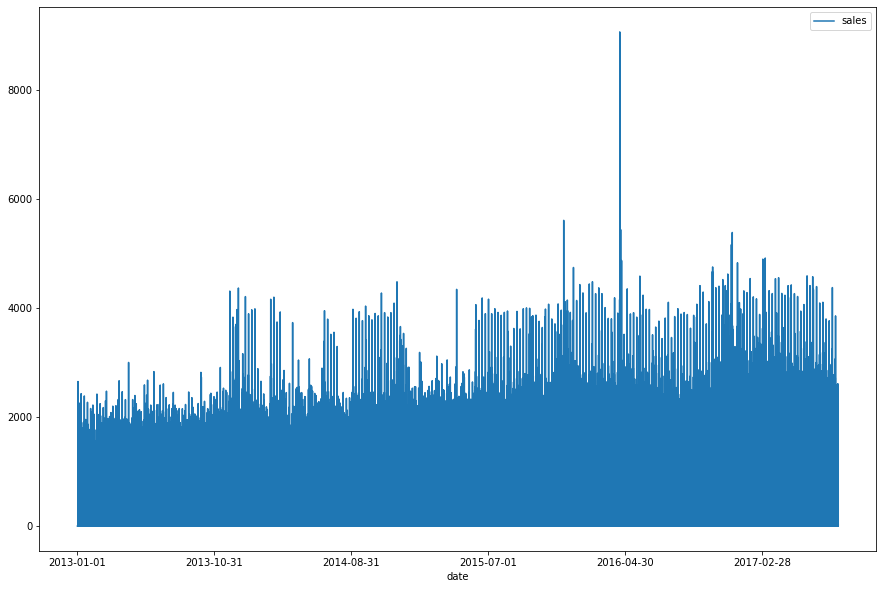

In [42]:
# plt.figure(figsize=(15,10))
df_store1.drop(columns=['id', 'store_nbr', 'family', 'onpromotion', 'city', 'state', 'type', 'cluster']).plot(figsize=(15,10));

In [44]:
df_store1_monthly.dtypes

sales    float64
dtype: object

In [46]:
df_store1_monthly = df_store1.drop(columns=['id', 'store_nbr', 'family', 'onpromotion', 'city', 'state', 'type', 'cluster'])

In [53]:
df_store1_monthly.index = pd.to_datetime(df_store1_monthly.index)

''

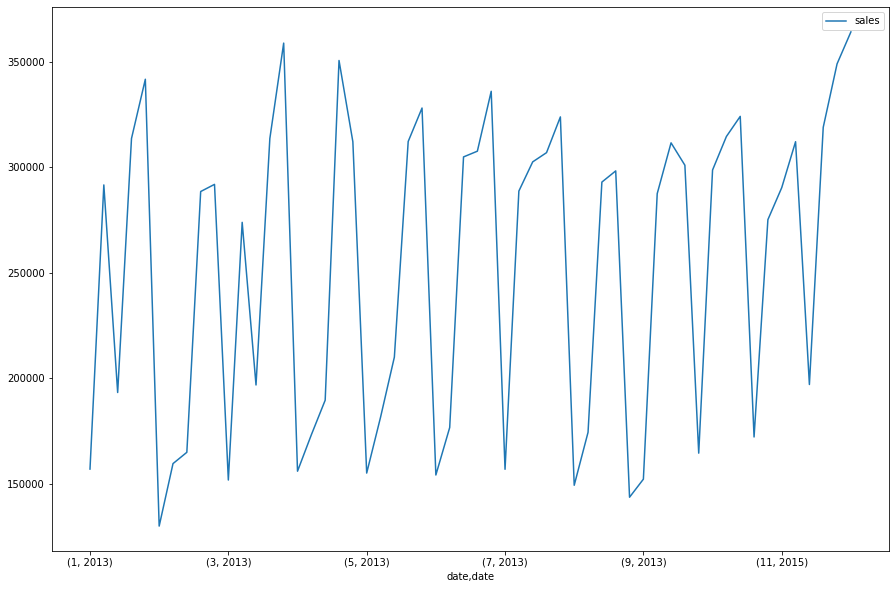

In [65]:
df_store1_monthly.groupby([df_store1_monthly.index.month, df_store1_monthly.index.year]).sum().plot( figsize=(15,10));''

In [59]:
df_store1_monthly_seaborn = df_store1_monthly.groupby([df_store1_monthly.index.month, df_store1_monthly.index.year]).sum()

In [62]:
sns.lineplot(x= df_store1_monthly['date'], y=df_store1_monthly['sales'])

KeyError: 'date'

In [30]:
df_store1['date'] = pd.to_datetime(df_store1['date'])
df_store1.dtypes


/tmp/ipykernel_6636/983122703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_store1['date'] = pd.to_datetime(df_store1['date'])


id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
city                   object
state                  object
type                   object
cluster                 int64
dtype: object

In [34]:
df_store1.set_index('date', inplace= True)

In [32]:
df_store1 = df_train_stores[df_train_stores['store_nbr']==1]


<AxesSubplot:xlabel='date', ylabel='sales'>

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.8.12/envs/business_c

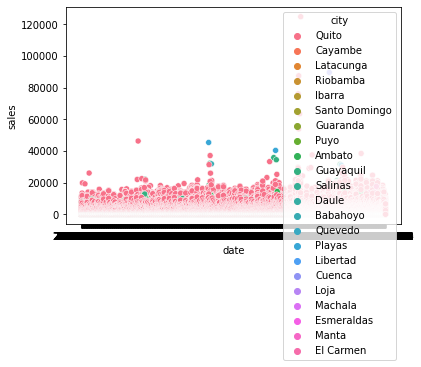

In [22]:
figsize
sns.scatterplot(x=df_train_stores['date'], y= df_train_stores['sales'], hue=df_train_stores['city'])

In [ ]:
df_train_stores_zero_sales["is_holiday"] = df_holidays["date"]

In [ ]:
if df_holidays["date"] in df_train_stores_zero_sales["date"]:
    df_train_stores_zero_sales["is_holiday"]==True

In [21]:
new = df_holidays["date"].isin(['2013-01-01'])
new.value_counts()

False    349
True       1
Name: date, dtype: int64

In [14]:
def finding_holidays(date):
    #if date in df_holidays["date"]:
    return df_holidays.isin(date)
        
        